Praktikum Decision Tree

In [22]:
import pandas as pd
import numpy as np
#memanggil data yang dibutuhkan
df=pd.read_csv('academic.csv')
import warnings
warnings.filterwarnings('ignore')

In [23]:
#menampilkan tabel awal (default 5 data)
df.head()

,ID,Class,Gender (X1),Status IMT (X2),Berkacamata (X3),Pernah Sakit (X4),Gangguan Psikis (X5),Aktif Bertanya (X6),Aktif Menjawab (X7),Mengerjakan Tugas (X8),...,Mengulang Materi (X13),Praktek Mandiri (X14),Berdiskusi (X15),Memiliki HP(X16),Memiliki Laptop (X17),Kecukupan Kuota Internet (X18),Dukungan Suasana rumah (X19),PLN (X20),Lokasi (X21),Ketersediaan Sinyal (X22)
0,1,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,3,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian
3,4,2,P,NORMAL,Tidak,Ya,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Kadang-kadang,Ya,Perkotaan,Ya
4,5,0,P,NORMAL,Tidak,Ya,Ya,Ya,Ya,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Kadang-kadang,Ya,Ya,Perkotaan,Sebagian


In [24]:
#Mengubah nama kolom
df.columns = [column.lower() for column in df.columns]
df.rename(columns={'gender (x1)':'x1', 'status imt (x2)' : 'x2', 'berkacamata (x3)' : 'x3',
       'pernah sakit (x4)' : 'x4', 'gangguan psikis (x5)' : 'x5', 'aktif bertanya (x6)' : 'x6',
       'aktif menjawab (x7)' : 'x7', 'mengerjakan tugas (x8)' : 'x8', 'tertarik materi (x9)' : 'x9',
       'alokasi jam belajar (x10)' : 'x10', 'memiliki referensi tambahan(x11)' : 'x11',
       'browsing dan youtube (x12)' : 'x12', 'mengulang materi (x13)' : 'x13',
       'praktek mandiri (x14)': 'x14', 'berdiskusi (x15)': 'x15', 'memiliki hp(x16)': 'x16',
       'memiliki laptop (x17)' : 'x17', 'kecukupan kuota internet (x18)': 'x18',
       'dukungan suasana rumah (x19)': 'x19', 'pln (x20)' : 'x20', 'lokasi (x21)': 'x21',
       'ketersediaan sinyal  (x22)': 'x22'}, inplace=True)
df.head()


,id,class,x1,x2,x3,x4,x5,x6,x7,x8,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,3,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian
3,4,2,P,NORMAL,Tidak,Ya,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Kadang-kadang,Ya,Perkotaan,Ya
4,5,0,P,NORMAL,Tidak,Ya,Ya,Ya,Ya,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Kadang-kadang,Ya,Ya,Perkotaan,Sebagian


In [25]:
#membersihkan kolom ID
df = df.drop('id', 1)
df


,class,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,Mungkin,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,Mungkin,...,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,Ya,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian
3,2,P,NORMAL,Tidak,Ya,Tidak,Tidak,Tidak,Semua,Mungkin,...,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Kadang-kadang,Ya,Perkotaan,Ya
4,0,P,NORMAL,Tidak,Ya,Ya,Ya,Ya,Semua,Ya,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Kadang-kadang,Ya,Ya,Perkotaan,Sebagian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,L,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,Ya,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Pedesaan,Sebagian
87,2,L,NORMAL,Tidak,Ya,Tidak,Tidak,Tidak,Semua,Mungkin,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
88,0,L,OBESITAS,Ya,Ya,Ya,Ya,Ya,Semua,Mungkin,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Kadang-kadang,Ya,Perkotaan,Sebagian
89,1,L,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,Ya,...,Kadang-kadang,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian


In [26]:
#mengubah data kategorik menjadi bentuk int
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['x1'] = label_encoder.fit_transform(df['x1'])
df['x2'] = label_encoder.fit_transform(df['x2'])
df['x3'] = label_encoder.fit_transform(df['x3'])
df['x4'] = label_encoder.fit_transform(df['x4'])
df['x5'] = label_encoder.fit_transform(df['x5'])
df['x6'] = label_encoder.fit_transform(df['x6'])
df['x7'] = label_encoder.fit_transform(df['x7'])
df['x8'] = label_encoder.fit_transform(df['x8'])
df['x9'] = label_encoder.fit_transform(df['x9'])
df['x10'] = label_encoder.fit_transform(df['x10'])
df['x11'] = label_encoder.fit_transform(df['x11'])
df['x12'] = label_encoder.fit_transform(df['x12'])
df['x13'] = label_encoder.fit_transform(df['x13'])
df['x14'] = label_encoder.fit_transform(df['x14'])
df['x15'] = label_encoder.fit_transform(df['x15'])
df['x16'] = label_encoder.fit_transform(df['x16'])
df['x17'] = label_encoder.fit_transform(df['x17'])
df['x18'] = label_encoder.fit_transform(df['x18'])
df['x19'] = label_encoder.fit_transform(df['x19'])
df['x20'] = label_encoder.fit_transform(df['x20'])
df['x21'] = label_encoder.fit_transform(df['x21'])
df['x22'] = label_encoder.fit_transform(df['x22'])

In [27]:
df

,class,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0,1,2,0,0,0,1,1,1,0,...,0,0,2,1,1,1,0,1,0,0
1,2,0,0,1,0,0,0,0,1,0,...,0,0,1,1,1,2,2,1,1,2
2,2,1,2,1,0,0,0,0,1,2,...,0,0,2,1,1,2,2,1,1,0
3,2,1,2,0,1,0,0,0,1,0,...,0,1,2,1,1,2,0,1,1,2
4,0,1,2,0,1,1,1,1,1,2,...,0,0,2,1,1,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,0,2,0,0,0,1,1,1,2,...,0,0,2,1,1,2,2,1,0,0
87,2,0,2,0,1,0,0,0,1,0,...,0,0,2,1,1,2,2,1,1,2
88,0,0,3,1,1,1,1,1,1,0,...,0,0,2,1,1,2,0,1,1,0
89,1,0,2,0,0,0,1,1,1,2,...,0,0,0,1,1,2,2,1,1,0


In [8]:
#mendeklarasikan mana yang menjadi prediktor (x) dan harapan (y)
x=df.drop('class', axis=1)
y=df['class']


In [28]:
#melakukan splitting data menggunakan perbandingan 3:7
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [10]:
#memanggil modul sklearn untuk decision tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
#memanggil fungsi Decision tree dan ditampung di variabel clf
clf = DecisionTreeClassifier()
#menjalankan fungsi terhadap data train
clf = clf.fit(x_train,y_train)
#mendapatkan rumusan prediksi
y_pred = clf.predict(x_test)
#dihitung tingkat akurasi sesuai dengan menggunakan rumusan y_pred sebelumnya
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6428571428571429


In [12]:
#memanggil library yang dibutuhkan
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

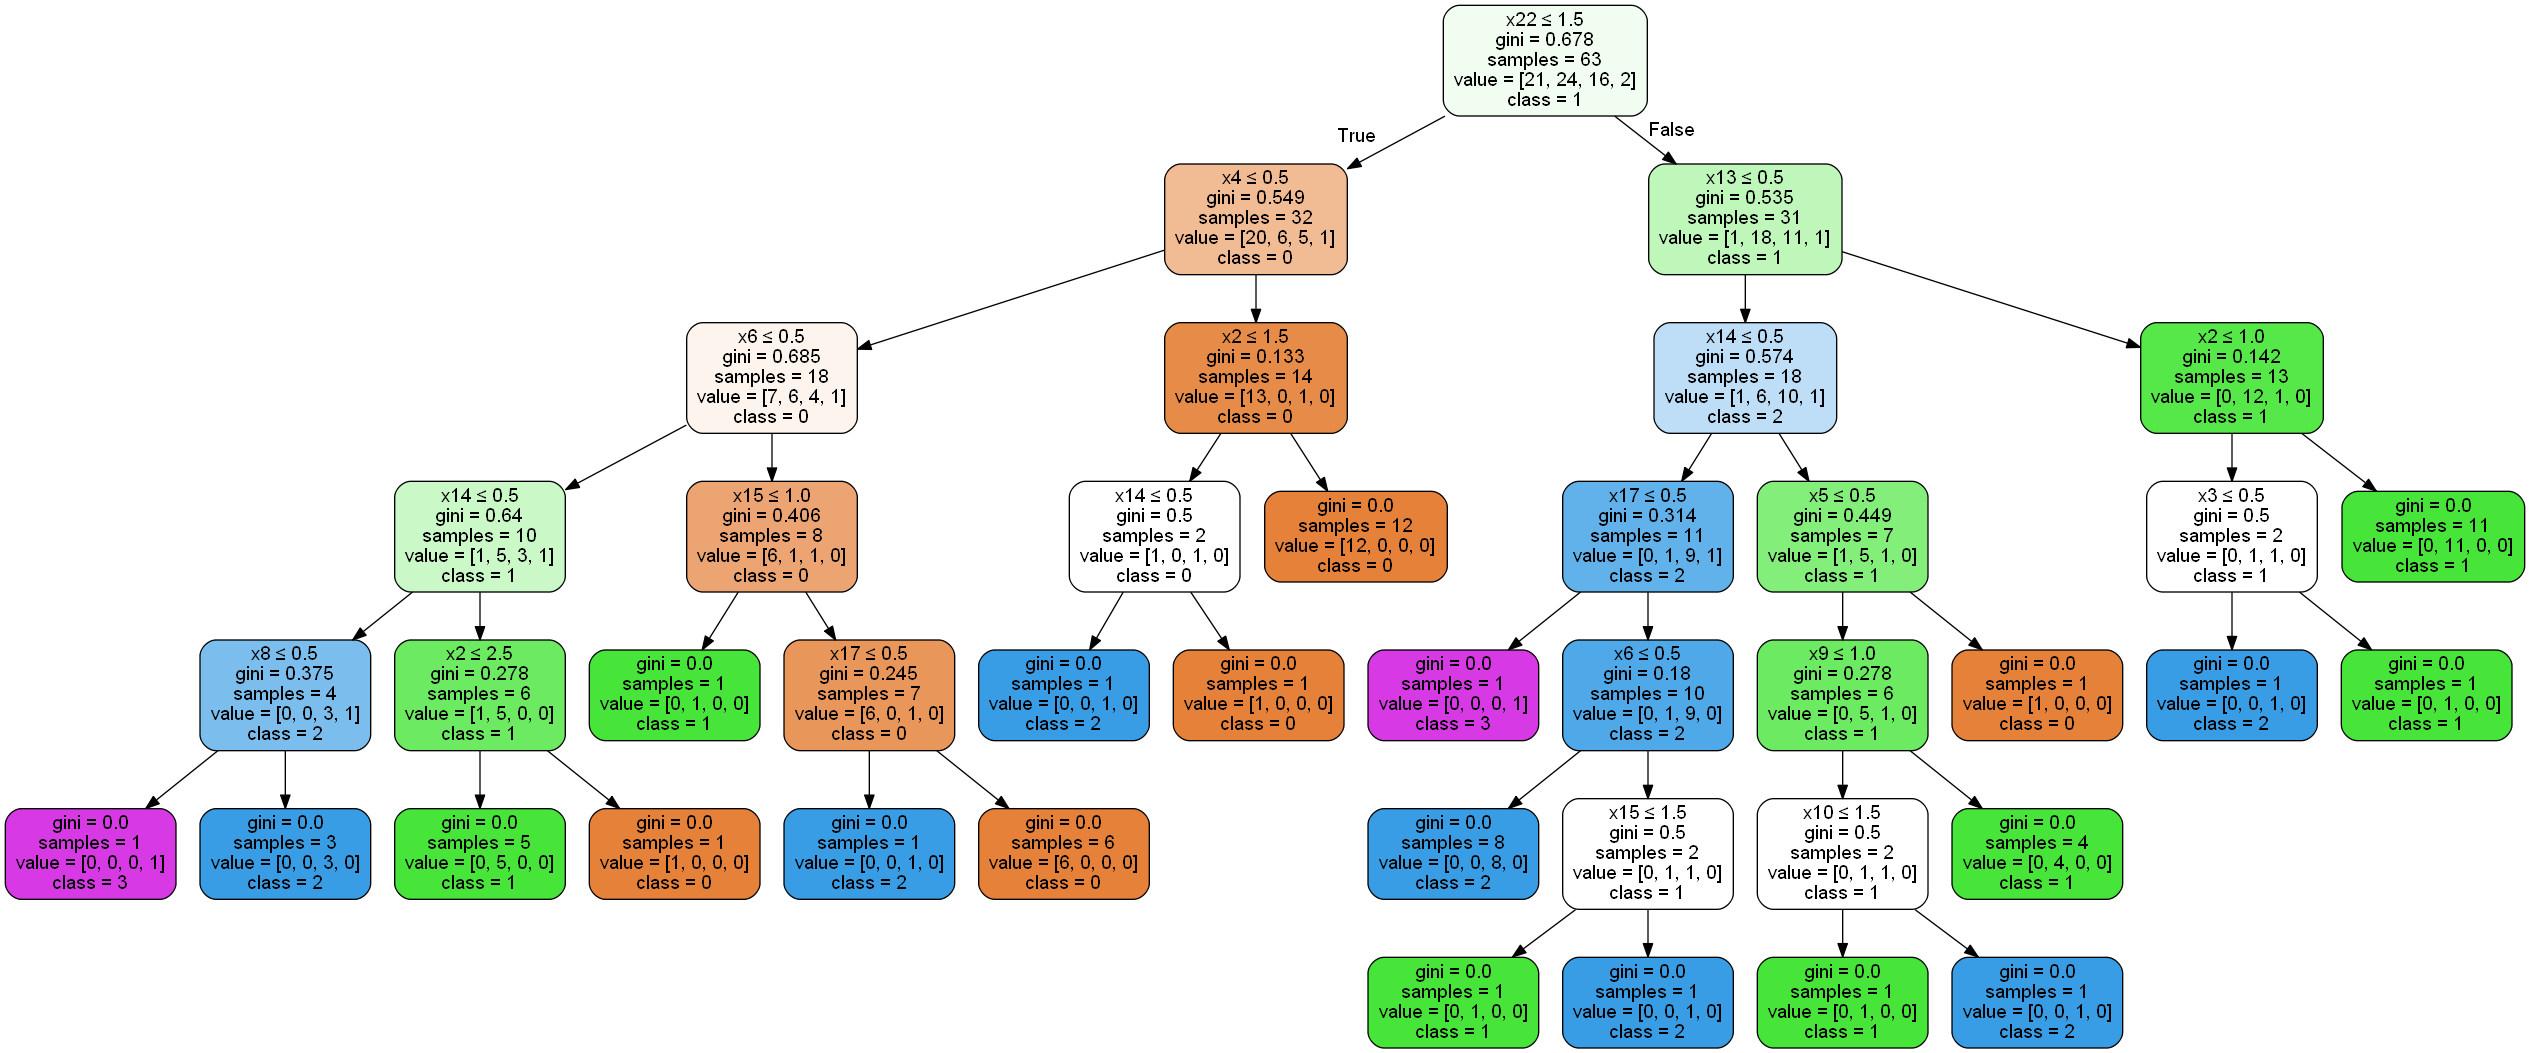

In [14]:
#menampilkan dan menyimpan grafik tree-nya
feature_names =['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('academic.png')
Image(graph.create_png())

In [29]:
#membuat decision tree berdasarkan entropy tetapi dengan kedalaman 3
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#menjalankan fungsi terhadap data train
clf = clf.fit(x_train,y_train)
#mendapatkan rumusan prediksi
y_pred = clf.predict(x_test)
#dihitung tingkat akurasi sesuai dengan menggunakan rumusan y_pred sebelumnya
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8214285714285714


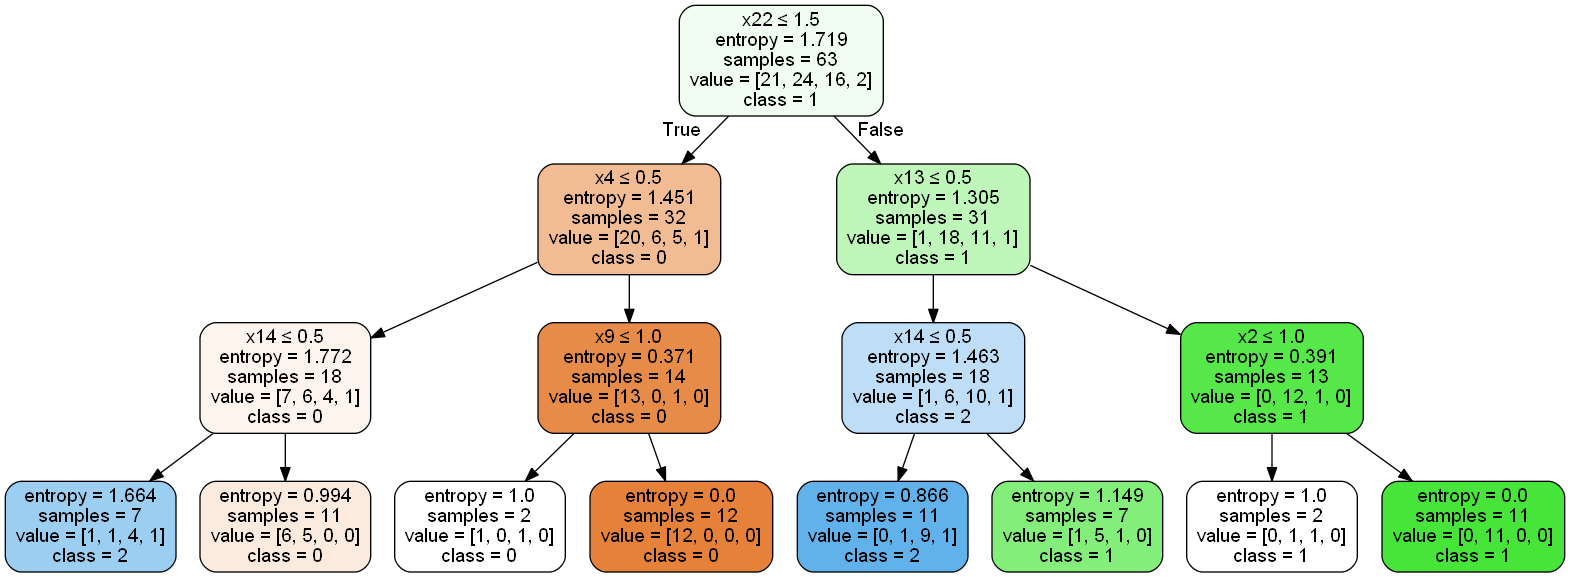

In [30]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names,class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('academic1.png')
Image(graph.create_png())

In [33]:
#membuat decision tree berdasarkan entropy tetapi dengan kedalaman 5
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#menjalankan fungsi terhadap data train
clf = clf.fit(x_train,y_train)
#mendapatkan rumusan prediksi
y_pred = clf.predict(x_test)
#dihitung tingkat akurasi sesuai dengan menggunakan rumusan y_pred sebelumnya
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6071428571428571
